# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [3]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [6]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [7]:
client = MongoClient(mongod_connect)
db = client.gp6 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [8]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [9]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [10]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1326360080774692865
1326360080975949824
1326360081169063938
1326360081332637702
1326360081273937925
1326360081248694275
1326360081307459584
1326360081437351937
1326360081307463684
1326360081429131264
1326360081282293762
1326360081445904390
1326360081613647872
1326360081550749697
1326360081500409857
1326360081794027520
1326360081861120000
1326360081739509760
1326360081932251136
1326360081911312386
1326360081882034179
1326360082028879872
1326360082041417731
1326360082175680512
1326360082242809856
1326360082318299136
1326360082280550400
1326360082649550848
1326360082595139584
1326360082733363200
1326360082729275398
1326360082792275969
1326360082725154820
1326360082775412736
1326360081835810816
1326360082712391680
1326360082804772864
1326360082867576833
1326360082808860672
1326360083115044871
1326360083022934023
1326360083085684736
1326360083165405187
1326360083102486528
1326360083115220994
1326360083194843137
1326360083316568064
1326360083308146695
1326360083467481090
1326360083446509569


1326360113641361409
1326360113641259009
1326360115134558210
1326360114991935488
1326360115188887552
1326360115138732034
1326360115293745152
1326360115210018816
1326360115339988993
1326360115302326272
1326360115285381122
1326360115184885761
1326360115381895168
1326360115235201026
1326360115377827840
1326360115390373889
1326360115268755457
1326360115394523138
1326360115394580480
1326360115512012801
1326360115499290625
1326360115491057664
1326360115667218432
1326360115692380160
1326360115482652679
1326360115704958982
1326360115461582848
1326360115692376065
1326360115545600001
1326360115801419777
1326360115822391308
1326360115855941632
1326360115889336320
1326360115964899329
1326360115889500161
1326360115990114305
1326360115893706752
1326360116329852928
1326360116325715969
1326360116489293824
1326360116631920647
1326360116573077504
1326360116761944064
1326360116694749184
1326360116703096833
1326360116879192064
1326360116862574596
1326360116879265792
1326360116883435520
1326360116887744512


1326360149481631749
1326360149548814337
1326360149624311808
1326360149624320001
1326360149720764421
1326360149934690306
1326360149985013761
1326360150098194433
1326360149980745728
1326360149955633157
1326360150052122624
1326360150026973186
1326360150182035456
1326360150211506176
1326360150156906496
1326360150278615041
1326360150282792960
1326360150354092035
1326360150433673216
1326360150471532544
1326360150630756352
1326360150664482816
1326360150639321099
1326360150660276224
1326360152845541377
1326360152908263424
1326360152983785473
1326360153004838913
1326360152916848641
1326360153101389824
1326360153227194369
1326360153197748224
1326360153222901762
1326360153235582978
1326360153290133504
1326360153390788608
1326360153260748802
1326360153298333696
1326360153432731648
1326360153499774976
1326360153537409026
1326360153671790593
1326360153675935744
1326360153814409216
1326360153864560640
1326360153835311105
1326360154032513026
1326360154112135170
1326360154049138693
1326360154124808193


1326360184856440833
1326360184852254722
1326360184793542656
1326360184881614849


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [11]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [12]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [15]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [17]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Tue Nov 10 18:05:25 +0000 2020'
'Tue Nov 10 18:05:22 +0000 2020'
'Tue Nov 10 18:05:20 +0000 2020'
'Tue Nov 10 18:05:14 +0000 2020'
'Tue Nov 10 18:05:14 +0000 2020'
'Tue Nov 10 18:05:13 +0000 2020'
'Tue Nov 10 18:05:04 +0000 2020'
'Tue Nov 10 18:05:00 +0000 2020'
'Tue Nov 10 18:04:54 +0000 2020'
'Tue Nov 10 18:04:47 +0000 2020'
'Tue Nov 10 18:04:36 +0000 2020'
'Tue Nov 10 18:04:27 +0000 2020'
'Tue Nov 10 18:04:19 +0000 2020'
'Tue Nov 10 18:04:06 +0000 2020'
'Tue Nov 10 18:03:57 +0000 2020'
'Tue Nov 10 18:03:43 +0000 2020'
'Tue Nov 10 18:03:26 +0000 2020'
'Tue Nov 10 18:02:57 +0000 2020'
'Tue Nov 10 18:02:49 +0000 2020'
'Tue Nov 10 18:02:34 +0000 2020'
'Tue Nov 10 18:02:27 +0000 2020'
'Tue Nov 10 18:02:06 +0000 2020'
'Tue Nov 10 18:02:04 +0000 2020'
'Tue Nov 10 18:02:00 +0000 2020'
'Tue Nov 10 18:01:48 +0000 2020'
'Tue Nov 10 18:01:25 +0000 2020'
'Tue Nov 10 18:01:19 +0000 2020'
'Tue Nov 10 18:01:11 +0000 2020'
'Tue Nov 10 18:00:50 +0000 2020'
'Tue Nov 10 18:00:46 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:22:36 +0000 2020'
'Tue Nov 10 17:22:31 +0000 2020'
'Tue Nov 10 17:22:15 +0000 2020'
'Tue Nov 10 17:22:13 +0000 2020'
'Tue Nov 10 17:22:11 +0000 2020'
'Tue Nov 10 17:21:49 +0000 2020'
'Tue Nov 10 17:21:30 +0000 2020'
'Tue Nov 10 17:21:00 +0000 2020'
'Tue Nov 10 17:20:49 +0000 2020'
'Tue Nov 10 17:20:47 +0000 2020'
'Tue Nov 10 17:20:28 +0000 2020'
'Tue Nov 10 17:20:14 +0000 2020'
'Tue Nov 10 17:19:58 +0000 2020'
'Tue Nov 10 17:19:58 +0000 2020'
'Tue Nov 10 17:19:26 +0000 2020'
'Tue Nov 10 17:19:24 +0000 2020'
'Tue Nov 10 17:18:56 +0000 2020'
'Tue Nov 10 17:18:27 +0000 2020'
'Tue Nov 10 17:18:19 +0000 2020'
'Tue Nov 10 17:17:52 +0000 2020'
'Tue Nov 10 17:17:22 +0000 2020'
'Tue Nov 10 17:17:19 +0000 2020'
'Tue Nov 10 17:17:14 +0000 2020'
'Tue Nov 10 17:17:06 +0000 2020'
'Tue Nov 10 17:16:55 +0000 2020'
'Tue Nov 10 17:16:45 +0000 2020'
'Tue Nov 10 17:16:26 +0000 2020'
'Tue Nov 10 17:16:25 +0000 2020'
'Tue Nov 10 17:16:22 +0000 2020'
'Tue Nov 10 17:16:05 +0000 2020'
'Tue Nov 1

'Tue Nov 10 16:47:39 +0000 2020'
'Tue Nov 10 16:47:33 +0000 2020'
'Tue Nov 10 16:47:29 +0000 2020'
'Tue Nov 10 16:47:29 +0000 2020'
'Tue Nov 10 16:47:27 +0000 2020'
'Tue Nov 10 16:47:26 +0000 2020'
'Tue Nov 10 16:47:24 +0000 2020'
'Tue Nov 10 16:47:20 +0000 2020'
'Tue Nov 10 16:47:20 +0000 2020'
'Tue Nov 10 16:47:20 +0000 2020'
'Tue Nov 10 16:47:19 +0000 2020'
'Tue Nov 10 16:47:18 +0000 2020'
'Tue Nov 10 16:47:16 +0000 2020'
'Tue Nov 10 16:47:16 +0000 2020'
'Tue Nov 10 16:47:15 +0000 2020'
'Tue Nov 10 16:47:13 +0000 2020'
'Tue Nov 10 16:47:10 +0000 2020'
'Tue Nov 10 16:47:07 +0000 2020'
'Tue Nov 10 16:46:59 +0000 2020'
'Tue Nov 10 16:46:59 +0000 2020'
'Tue Nov 10 16:46:48 +0000 2020'
'Tue Nov 10 16:46:43 +0000 2020'
'Tue Nov 10 16:46:37 +0000 2020'
'Tue Nov 10 16:46:37 +0000 2020'
'Tue Nov 10 16:46:36 +0000 2020'
'Tue Nov 10 16:46:35 +0000 2020'
'Tue Nov 10 16:46:31 +0000 2020'
'Tue Nov 10 16:46:24 +0000 2020'
'Tue Nov 10 16:46:24 +0000 2020'
'Tue Nov 10 16:46:19 +0000 2020'
'Tue Nov 1

'Tue Nov 10 16:35:33 +0000 2020'
'Tue Nov 10 16:35:33 +0000 2020'
'Tue Nov 10 16:35:29 +0000 2020'
'Tue Nov 10 16:35:22 +0000 2020'
'Tue Nov 10 16:35:13 +0000 2020'
'Tue Nov 10 16:35:12 +0000 2020'
'Tue Nov 10 16:35:09 +0000 2020'
'Tue Nov 10 16:35:08 +0000 2020'
'Tue Nov 10 16:35:04 +0000 2020'
'Tue Nov 10 16:35:03 +0000 2020'
'Tue Nov 10 16:35:02 +0000 2020'
'Tue Nov 10 16:35:01 +0000 2020'
'Tue Nov 10 16:35:00 +0000 2020'
'Tue Nov 10 16:34:57 +0000 2020'
'Tue Nov 10 16:34:57 +0000 2020'
'Tue Nov 10 16:34:56 +0000 2020'
'Tue Nov 10 16:34:52 +0000 2020'
'Tue Nov 10 16:34:52 +0000 2020'
'Tue Nov 10 16:34:50 +0000 2020'
'Tue Nov 10 16:34:49 +0000 2020'
'Tue Nov 10 16:34:46 +0000 2020'
'Tue Nov 10 16:34:46 +0000 2020'
'Tue Nov 10 16:34:40 +0000 2020'
'Tue Nov 10 16:34:40 +0000 2020'
'Tue Nov 10 16:34:35 +0000 2020'
'Tue Nov 10 16:34:33 +0000 2020'
'Tue Nov 10 16:34:30 +0000 2020'
'Tue Nov 10 16:34:29 +0000 2020'
'Tue Nov 10 16:34:19 +0000 2020'
'Tue Nov 10 16:34:19 +0000 2020'
'Tue Nov 1

'Tue Nov 10 14:47:27 +0000 2020'
'Tue Nov 10 14:44:48 +0000 2020'
'Tue Nov 10 14:44:33 +0000 2020'
'Tue Nov 10 14:44:24 +0000 2020'
'Tue Nov 10 14:44:13 +0000 2020'
'Tue Nov 10 14:43:56 +0000 2020'
'Tue Nov 10 14:43:43 +0000 2020'
'Tue Nov 10 14:42:47 +0000 2020'
'Tue Nov 10 14:41:32 +0000 2020'
'Tue Nov 10 14:41:26 +0000 2020'
'Tue Nov 10 14:38:12 +0000 2020'
'Tue Nov 10 14:37:16 +0000 2020'
'Tue Nov 10 14:36:53 +0000 2020'
'Tue Nov 10 14:34:08 +0000 2020'
'Tue Nov 10 14:33:50 +0000 2020'
'Tue Nov 10 14:32:34 +0000 2020'
'Tue Nov 10 14:31:20 +0000 2020'
'Tue Nov 10 14:27:36 +0000 2020'
'Tue Nov 10 14:27:26 +0000 2020'
'Tue Nov 10 14:26:53 +0000 2020'
'Tue Nov 10 14:26:49 +0000 2020'
'Tue Nov 10 14:26:26 +0000 2020'
'Tue Nov 10 14:23:53 +0000 2020'
'Tue Nov 10 14:22:30 +0000 2020'
'Tue Nov 10 14:22:02 +0000 2020'
'Tue Nov 10 14:21:13 +0000 2020'
'Tue Nov 10 14:19:24 +0000 2020'
'Tue Nov 10 14:18:10 +0000 2020'
'Tue Nov 10 14:16:35 +0000 2020'
'Tue Nov 10 14:15:19 +0000 2020'
'Tue Nov 1

'Tue Nov 10 09:27:57 +0000 2020'
'Tue Nov 10 09:24:13 +0000 2020'
'Tue Nov 10 09:23:48 +0000 2020'
'Tue Nov 10 09:20:47 +0000 2020'
'Tue Nov 10 09:15:27 +0000 2020'
'Tue Nov 10 09:14:14 +0000 2020'
'Tue Nov 10 09:04:11 +0000 2020'
'Tue Nov 10 08:53:11 +0000 2020'
'Tue Nov 10 08:50:21 +0000 2020'
'Tue Nov 10 08:45:51 +0000 2020'
'Tue Nov 10 08:45:38 +0000 2020'
'Tue Nov 10 08:42:53 +0000 2020'
'Tue Nov 10 08:41:57 +0000 2020'
'Tue Nov 10 08:37:01 +0000 2020'
'Tue Nov 10 08:30:48 +0000 2020'
'Tue Nov 10 08:30:17 +0000 2020'
'Tue Nov 10 08:25:50 +0000 2020'
'Tue Nov 10 08:25:27 +0000 2020'
'Tue Nov 10 08:23:37 +0000 2020'
'Tue Nov 10 08:21:29 +0000 2020'
'Tue Nov 10 08:19:48 +0000 2020'
'Tue Nov 10 08:12:13 +0000 2020'
'Tue Nov 10 08:10:18 +0000 2020'
'Tue Nov 10 08:08:54 +0000 2020'
'Tue Nov 10 08:08:07 +0000 2020'
'Tue Nov 10 08:07:30 +0000 2020'
'Tue Nov 10 08:05:25 +0000 2020'
'Tue Nov 10 08:02:58 +0000 2020'
'Tue Nov 10 08:00:18 +0000 2020'
'Tue Nov 10 07:58:33 +0000 2020'
'Tue Nov 1

'Tue Nov 10 04:09:57 +0000 2020'
'Tue Nov 10 04:09:42 +0000 2020'
'Tue Nov 10 04:09:32 +0000 2020'
'Tue Nov 10 04:09:32 +0000 2020'
'Tue Nov 10 04:09:26 +0000 2020'
'Tue Nov 10 04:09:13 +0000 2020'
'Tue Nov 10 04:09:00 +0000 2020'
'Tue Nov 10 04:08:49 +0000 2020'
'Tue Nov 10 04:08:48 +0000 2020'
'Tue Nov 10 04:08:45 +0000 2020'
'Tue Nov 10 04:08:25 +0000 2020'
'Tue Nov 10 04:07:33 +0000 2020'
'Tue Nov 10 04:07:06 +0000 2020'
'Tue Nov 10 04:06:48 +0000 2020'
'Tue Nov 10 04:06:32 +0000 2020'
'Tue Nov 10 04:06:09 +0000 2020'
'Tue Nov 10 04:05:28 +0000 2020'
'Tue Nov 10 04:04:48 +0000 2020'
'Tue Nov 10 04:03:24 +0000 2020'
'Tue Nov 10 04:03:17 +0000 2020'
'Tue Nov 10 04:02:49 +0000 2020'
'Tue Nov 10 04:02:44 +0000 2020'
'Tue Nov 10 04:01:18 +0000 2020'
'Tue Nov 10 04:01:12 +0000 2020'
'Tue Nov 10 04:01:04 +0000 2020'
'Tue Nov 10 04:00:56 +0000 2020'
'Tue Nov 10 03:59:27 +0000 2020'
'Tue Nov 10 03:58:44 +0000 2020'
'Tue Nov 10 03:58:19 +0000 2020'
'Tue Nov 10 03:56:24 +0000 2020'
'Tue Nov 1

'Tue Nov 10 02:32:09 +0000 2020'
'Tue Nov 10 02:31:18 +0000 2020'
'Tue Nov 10 02:29:42 +0000 2020'
'Tue Nov 10 02:29:22 +0000 2020'
'Tue Nov 10 02:29:18 +0000 2020'
'Tue Nov 10 02:29:06 +0000 2020'
'Tue Nov 10 02:28:52 +0000 2020'
'Tue Nov 10 02:28:27 +0000 2020'
'Tue Nov 10 02:28:02 +0000 2020'
'Tue Nov 10 02:27:55 +0000 2020'
'Tue Nov 10 02:27:43 +0000 2020'
'Tue Nov 10 02:27:01 +0000 2020'
'Tue Nov 10 02:26:58 +0000 2020'
'Tue Nov 10 02:26:50 +0000 2020'
'Tue Nov 10 02:26:39 +0000 2020'
'Tue Nov 10 02:26:33 +0000 2020'
'Tue Nov 10 02:26:19 +0000 2020'
'Tue Nov 10 02:25:43 +0000 2020'
'Tue Nov 10 02:25:03 +0000 2020'
'Tue Nov 10 02:24:53 +0000 2020'
'Tue Nov 10 02:24:43 +0000 2020'
'Tue Nov 10 02:24:33 +0000 2020'
'Tue Nov 10 02:23:56 +0000 2020'
'Tue Nov 10 02:23:20 +0000 2020'
'Tue Nov 10 02:23:19 +0000 2020'
'Tue Nov 10 02:23:13 +0000 2020'
'Tue Nov 10 02:22:51 +0000 2020'
'Tue Nov 10 02:22:29 +0000 2020'
'Tue Nov 10 02:22:21 +0000 2020'
'Tue Nov 10 02:22:14 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:15:32 +0000 2020'
'Tue Nov 10 01:15:27 +0000 2020'
'Tue Nov 10 01:15:15 +0000 2020'
'Tue Nov 10 01:14:57 +0000 2020'
'Tue Nov 10 01:14:57 +0000 2020'
'Tue Nov 10 01:14:41 +0000 2020'
'Tue Nov 10 01:14:40 +0000 2020'
'Tue Nov 10 01:14:39 +0000 2020'
'Tue Nov 10 01:14:37 +0000 2020'
'Tue Nov 10 01:14:19 +0000 2020'
'Tue Nov 10 01:14:16 +0000 2020'
'Tue Nov 10 01:14:14 +0000 2020'
'Tue Nov 10 01:14:07 +0000 2020'
'Tue Nov 10 01:14:00 +0000 2020'
'Tue Nov 10 01:13:33 +0000 2020'
'Tue Nov 10 01:13:21 +0000 2020'
'Tue Nov 10 01:13:21 +0000 2020'
'Tue Nov 10 01:13:21 +0000 2020'
'Tue Nov 10 01:13:17 +0000 2020'
'Tue Nov 10 01:12:59 +0000 2020'
'Tue Nov 10 01:12:57 +0000 2020'
'Tue Nov 10 01:12:57 +0000 2020'
'Tue Nov 10 01:12:43 +0000 2020'
'Tue Nov 10 01:12:31 +0000 2020'
'Tue Nov 10 01:12:28 +0000 2020'
'Tue Nov 10 01:12:10 +0000 2020'
'Tue Nov 10 01:12:01 +0000 2020'
'Tue Nov 10 01:11:54 +0000 2020'
'Tue Nov 10 01:11:50 +0000 2020'
'Tue Nov 10 01:11:28 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:42:10 +0000 2020'
'Tue Nov 10 00:42:04 +0000 2020'
'Tue Nov 10 00:42:00 +0000 2020'
'Tue Nov 10 00:41:58 +0000 2020'
'Tue Nov 10 00:41:53 +0000 2020'
'Tue Nov 10 00:41:45 +0000 2020'
'Tue Nov 10 00:41:10 +0000 2020'
'Tue Nov 10 00:41:05 +0000 2020'
'Tue Nov 10 00:41:02 +0000 2020'
'Tue Nov 10 00:40:52 +0000 2020'
'Tue Nov 10 00:40:49 +0000 2020'
'Tue Nov 10 00:40:47 +0000 2020'
'Tue Nov 10 00:40:41 +0000 2020'
'Tue Nov 10 00:40:40 +0000 2020'
'Tue Nov 10 00:40:25 +0000 2020'
'Tue Nov 10 00:40:24 +0000 2020'
'Tue Nov 10 00:40:20 +0000 2020'
'Tue Nov 10 00:40:13 +0000 2020'
'Tue Nov 10 00:40:04 +0000 2020'
'Tue Nov 10 00:40:02 +0000 2020'
'Tue Nov 10 00:40:00 +0000 2020'
'Tue Nov 10 00:39:55 +0000 2020'
'Tue Nov 10 00:39:51 +0000 2020'
'Tue Nov 10 00:39:49 +0000 2020'
'Tue Nov 10 00:39:41 +0000 2020'
'Tue Nov 10 00:39:41 +0000 2020'
'Tue Nov 10 00:39:38 +0000 2020'
'Tue Nov 10 00:39:34 +0000 2020'
'Tue Nov 10 00:39:30 +0000 2020'
'Tue Nov 10 00:39:28 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:22:36 +0000 2020'
'Tue Nov 10 00:22:33 +0000 2020'
'Tue Nov 10 00:22:33 +0000 2020'
'Tue Nov 10 00:22:28 +0000 2020'
'Tue Nov 10 00:22:28 +0000 2020'
'Tue Nov 10 00:22:24 +0000 2020'
'Tue Nov 10 00:22:21 +0000 2020'
'Tue Nov 10 00:22:19 +0000 2020'
'Tue Nov 10 00:22:19 +0000 2020'
'Tue Nov 10 00:22:18 +0000 2020'
'Tue Nov 10 00:22:18 +0000 2020'
'Tue Nov 10 00:22:16 +0000 2020'
'Tue Nov 10 00:22:15 +0000 2020'
'Tue Nov 10 00:22:14 +0000 2020'
'Tue Nov 10 00:22:14 +0000 2020'
'Tue Nov 10 00:22:10 +0000 2020'
'Tue Nov 10 00:22:09 +0000 2020'
'Tue Nov 10 00:22:08 +0000 2020'
'Tue Nov 10 00:22:05 +0000 2020'
'Tue Nov 10 00:21:53 +0000 2020'
'Tue Nov 10 00:21:52 +0000 2020'
'Tue Nov 10 00:21:50 +0000 2020'
'Tue Nov 10 00:21:49 +0000 2020'
'Tue Nov 10 00:21:49 +0000 2020'
'Tue Nov 10 00:21:45 +0000 2020'
'Tue Nov 10 00:21:45 +0000 2020'
'Tue Nov 10 00:21:44 +0000 2020'
'Tue Nov 10 00:21:44 +0000 2020'
'Tue Nov 10 00:21:37 +0000 2020'
'Tue Nov 10 00:21:36 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:15:12 +0000 2020'
'Tue Nov 10 00:15:11 +0000 2020'
'Tue Nov 10 00:15:09 +0000 2020'
'Tue Nov 10 00:15:09 +0000 2020'
'Tue Nov 10 00:15:06 +0000 2020'
'Tue Nov 10 00:15:05 +0000 2020'
'Tue Nov 10 00:15:03 +0000 2020'
'Tue Nov 10 00:15:02 +0000 2020'
'Tue Nov 10 00:14:58 +0000 2020'
'Tue Nov 10 00:14:57 +0000 2020'
'Tue Nov 10 00:14:55 +0000 2020'
'Tue Nov 10 00:14:54 +0000 2020'
'Tue Nov 10 00:14:52 +0000 2020'
'Tue Nov 10 00:14:52 +0000 2020'
'Tue Nov 10 00:14:52 +0000 2020'
'Tue Nov 10 00:14:50 +0000 2020'
'Tue Nov 10 00:14:49 +0000 2020'
'Tue Nov 10 00:14:47 +0000 2020'
'Tue Nov 10 00:14:45 +0000 2020'
'Tue Nov 10 00:14:45 +0000 2020'
'Tue Nov 10 00:14:45 +0000 2020'
'Tue Nov 10 00:14:43 +0000 2020'
'Tue Nov 10 00:14:43 +0000 2020'
'Tue Nov 10 00:14:42 +0000 2020'
'Tue Nov 10 00:14:41 +0000 2020'
'Tue Nov 10 00:14:40 +0000 2020'
'Tue Nov 10 00:14:36 +0000 2020'
'Tue Nov 10 00:14:34 +0000 2020'
'Tue Nov 10 00:14:32 +0000 2020'
'Tue Nov 10 00:14:31 +0000 2020'
'Tue Nov 1

'Mon Nov 09 23:15:38 +0000 2020'
'Mon Nov 09 23:15:18 +0000 2020'
'Mon Nov 09 23:15:09 +0000 2020'
'Mon Nov 09 23:14:45 +0000 2020'
'Mon Nov 09 23:14:39 +0000 2020'
'Mon Nov 09 23:13:47 +0000 2020'
'Mon Nov 09 23:13:29 +0000 2020'
'Mon Nov 09 23:12:55 +0000 2020'
'Mon Nov 09 23:12:07 +0000 2020'
'Mon Nov 09 23:11:58 +0000 2020'
'Mon Nov 09 23:11:11 +0000 2020'
'Mon Nov 09 23:11:08 +0000 2020'
'Mon Nov 09 23:11:05 +0000 2020'
'Mon Nov 09 23:11:05 +0000 2020'
'Mon Nov 09 23:10:59 +0000 2020'
'Mon Nov 09 23:10:19 +0000 2020'
'Mon Nov 09 23:10:17 +0000 2020'
'Mon Nov 09 23:10:17 +0000 2020'
'Mon Nov 09 23:09:48 +0000 2020'
'Mon Nov 09 23:09:41 +0000 2020'
'Mon Nov 09 23:09:19 +0000 2020'
'Mon Nov 09 23:09:14 +0000 2020'
'Mon Nov 09 23:08:48 +0000 2020'
'Mon Nov 09 23:08:42 +0000 2020'
'Mon Nov 09 23:08:37 +0000 2020'
'Mon Nov 09 23:08:27 +0000 2020'
'Mon Nov 09 23:07:56 +0000 2020'
'Mon Nov 09 23:07:31 +0000 2020'
'Mon Nov 09 23:07:12 +0000 2020'
'Mon Nov 09 23:07:03 +0000 2020'
'Mon Nov 0

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [18]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

5954
5273


Create a text index and print the Tweets containing specific keywords. 

In [19]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [22]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [23]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
        #pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: John flores
text: RT @OldKentuckyHome: @kylegriffin1 You are not up - in EC or popular vote

Counting every vote isn't stealing an election

Votes aren't bei…
----
name: Bruce Eppard
text: When they show 98% of the votes was counted, that shows how many people voted per state &amp; not how many votes that w… https://t.co/BWLjPXixb6
----
name: MrMacattack
text: @Jim_Jordan Audit 5 million plus votes the most votes any President ever earned in a Presidential election.
----
name: John Carter
text: @CNNPolitics Election winner has not been certified. More votes to be counted illegal votes need to be rejected and voter fraud prosecuted.
----
name: 1QjuddQ7
text: RT @FredR15586266: The election will be over when every LEGAL vote is counted and every ILLEGAL vote is thrown out. Not too hard to underst…
----
name: Chris
text: @maziehirono - did you know the states have to certify the votes FIRST?

THEN the Electoral College has to vote?

J… https://t.co/7IAPTifPxj
----
name: Shela C

In [24]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [25]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,reply_count,filter_level,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,extended_entities
0,5fab5672cf20365f313dade0,Tue Nov 10 03:01:13 +0000 2020,1325996906980364289,1325996906980364289,RT @OldKentuckyHome: @kylegriffin1 You are not...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fab5636cf20365f313da2b1,Tue Nov 10 22:01:44 +0000 2020,1326283929721196545,1326283929721196545,"When they show 98% of the votes was counted, t...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326284e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fab55a3cf20365f313da0a9,Wed Nov 11 02:54:07 +0000 2020,1326357510761172993,1326357510761172993,@Jim_Jordan Audit 5 million plus votes the mos...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326335e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fab54bfcf20365f313d9cd9,Wed Nov 11 03:04:26 +0000 2020,1326360104581664768,1326360104581664768,@CNNPolitics Election winner has not been cert...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.326360e+18,...,0.0,low,1605063866168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fab54c3cf20365f313d9d97,Wed Nov 11 03:04:30 +0000 2020,1326360121010769921,1326360121010769921,RT @FredR15586266: The election will be over w...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,0.0,low,1605063870085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fab54bdcf20365f313d9c6c,Wed Nov 11 03:04:24 +0000 2020,1326360095672860673,1326360095672860673,@maziehirono - did you know the states have to...,True,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,"<a href=""http://twitter.com/download/android"" ...",NaN,...,0.0,low,1605063864044,1.325895e+18,1325894844078809088,{'created_at': 'Mon Nov 09 20:15:39 +0000 2020...,"{'url': 'https://t.co/wZvBTuLpd6', 'expanded':...",{'full_text': '@maziehirono - did you know the...,NaN,NaN
6,5fab5669cf20365f313dac3b,Tue Nov 10 07:40:24 +0000 2020,1326067167197007872,1326067167197007872,@OhheyKell You can register to vote on electio...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326067e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fab5638cf20365f313da356,Tue Nov 10 20:57:36 +0000 2020,1326267791217930241,1326267791217930241,“You’re bringing into question all these Ameri...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
8,5fab54d0cf20365f313da015,Wed Nov 11 03:04:42 +0000 2020,1326360174941138944,1326360174941138944,RT @TomFitton: Extended and secretive vote cou...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,0.0,low,1605063882943,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fab54c8cf20365f313d9e94,Wed Nov 11 03:04:35 +0000 2020,1326360142351364096,1326360142351364096,RT @TomFitton: Extended and secretive vote cou...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0.0,low,1605063875173,NaN,NaN,NaN,NaN,NaN,NaN,NaN


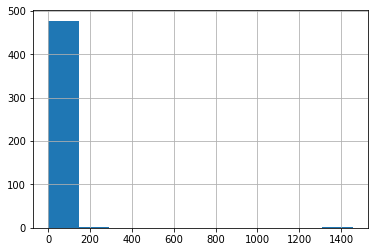

In [26]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count